# Topic 38: Time Series Models

- 05/27/21
- onl01-dtsc-ft-022221

## Learning Objectives:



- Learn about PACF, ACF
- Introduce ARIMA and SARIMA models.
- Activity: SARIMA Models - Lab




## Questions

## References

- [Pandas Timeseries Documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html)
- ['Timeseries Offset Aliases'](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases)
- [Anchored Offsets](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#anchored-offsets)


- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.html

# Basic Time Series models

- White Noise Model
- Randon Walk Model

#### White Noise Model
- 3 Properties:
    - Fixed and constant mean
    - Fixed and constant variance
    - No correlation over time

- Gaussian White Noise: A special case of a White Noise model is 
    - Mean is equal to zero
    - variance is equal to 1
    $$\large Y_t = \epsilon_t + \theta * \epsilon_{t-1}$$


In [10]:
import fsds as fs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
pd.set_option('precision',3)
plt.rcParams['figure.figsize'] = [12,4]

In [11]:
# ## Pandas DataReader Import
# # ""%conda install -c anaconda pandas-datareader
# import pandas_datareader as pdr
# example = pdr.DataReader('GOOGL','yahoo','2012','2020')

monthly_return    0.014
dtype: float64

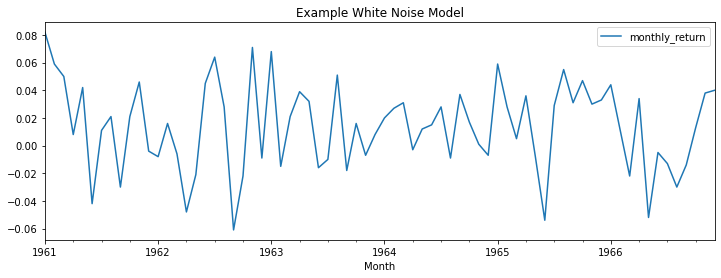

In [14]:
nyse = fs.datasets.load_ts_nyse_monthly(read_csv_kwds={'parse_dates':True,
                                                     'index_col':'Month'})
nyse.plot(title='Example White Noise Model')
nyse.mean()


#### Random Walk Model
- Two Properties:
    - Has no specified mean or variance
    - Has a strong dependence over time

- Mathematically, this can be written as:

$$\large Y_t = Y_{t-1} + \epsilon_t$$

- Where $\epsilon_t$ is a *mean zero* white noise model!

- Random Walk with a Drift":
    - a drift parameter $c$, steering in a certain direction.
$$\large Y_t = c + Y_{t-1} + \epsilon_t$$

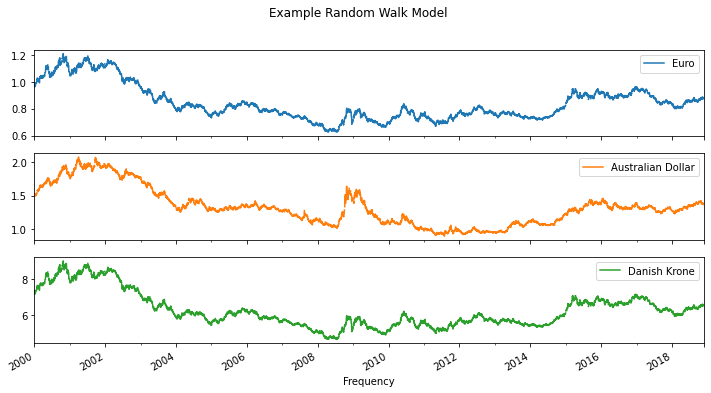

In [3]:
exch = fs.datasets.load_ts_exch_rates(read_csv_kwds={'parse_dates':['Frequency'],
                                                     'index_col':'Frequency'})
exch.plot(subplots=True,figsize=(12,6),title='Example Random Walk Model');

- When a random walk is differenced it returns a white noise. 

This is a result of the mathematical formula:

$$Y_t = Y_{t-1} + \epsilon_t$$
which is equivalent to
$$Y_t - Y_{t-1} = \epsilon_t$$

and we know that $\epsilon_t$ is a mean-zero white noise process! 

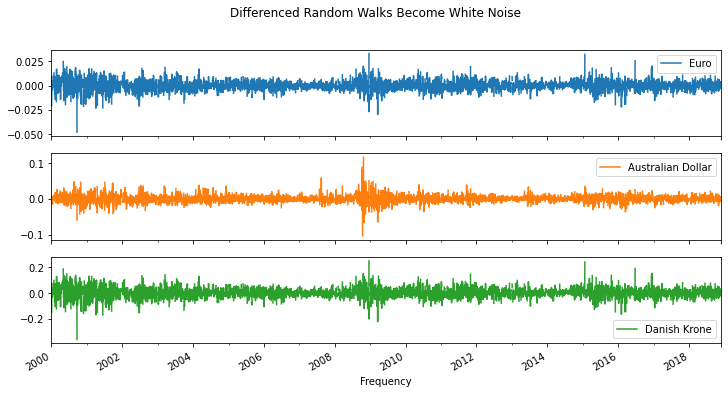

In [4]:
exch.diff().plot(subplots=True,figsize=(12,6),
                 title='Differenced Random Walks Become White Noise');


# Correlation, Autocorrelation & Partial Autocorrelation

<AxesSubplot:xlabel='Month'>

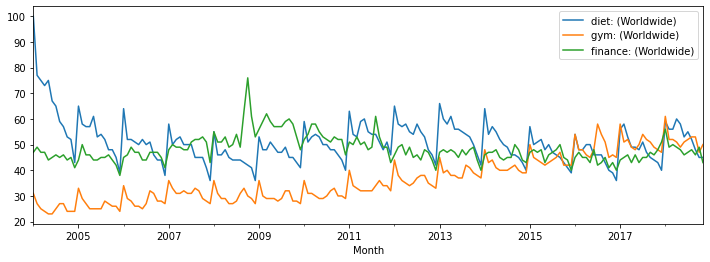

In [5]:
trends = fs.datasets.load_ts_google_trends(read_csv_kwds={'skiprows':1,
                                                         'parse_dates':['Month'],
                                                         'index_col':['Month']})
trends.plot()

In [6]:
## Correlation
trends.corr().style.background_gradient()

,diet: (Worldwide),gym: (Worldwide),finance: (Worldwide)
diet: (Worldwide),1.000,-0.051,-0.027
gym: (Worldwide),-0.051,1.000,-0.223
finance: (Worldwide),-0.027,-0.223,1.000


,diet: (Worldwide),gym: (Worldwide),finance: (Worldwide)
diet: (Worldwide),1.000,0.793,0.395
gym: (Worldwide),0.793,1.000,0.342
finance: (Worldwide),0.395,0.342,1.000


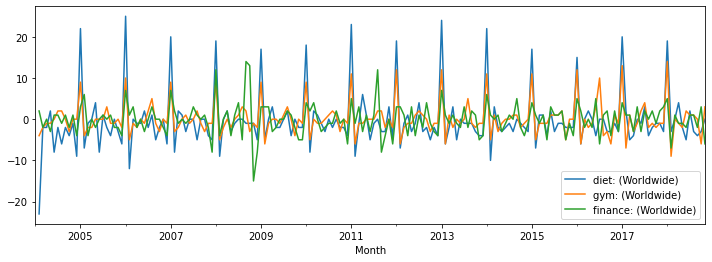

In [7]:
## Detrending Reveals Higher Underly Cross-Correlation
trends.diff().plot()
trends.diff().corr().style.background_gradient()
## We Removed the Trend without Removing Seaonality

<ipython-input-8-ab19ae076419>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_shifted[f"Shifted by {n}"] = ts_shifted.shift(n)


<AxesSubplot:xlabel='Month'>

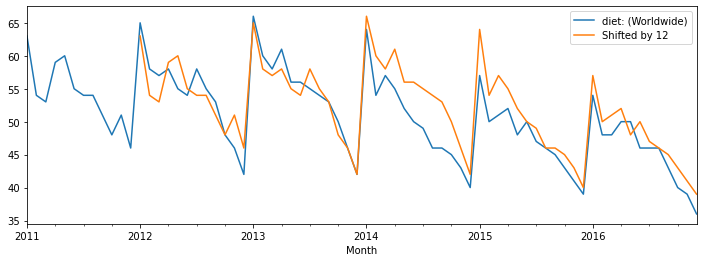

In [8]:
## Seasonality causes correlations at specific times
n=12
ts = trends[['diet: (Worldwide)']]
ts_shifted = ts.loc['2011':'2016']
ts_shifted[f"Shifted by {n}"] = ts_shifted.shift(n)
ts_shifted.plot()

### Demonstrating Autocorrelation

<AxesSubplot:xlabel='Month'>

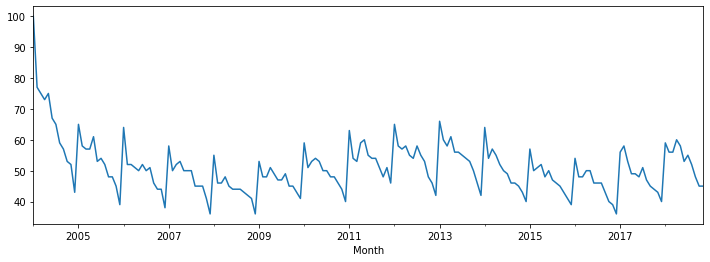

In [9]:
ts = trends['diet: (Worldwide)']
ts.plot()

In [10]:
ts

Month
2004-01-01    100
2004-02-01     77
2004-03-01     75
2004-04-01     73
2004-05-01     75
             ... 
2018-07-01     55
2018-08-01     52
2018-09-01     48
2018-10-01     45
2018-11-01     45
Name: diet: (Worldwide), Length: 179, dtype: int64

In [11]:
ts.shift(1)

Month
2004-01-01      NaN
2004-02-01    100.0
2004-03-01     77.0
2004-04-01     75.0
2004-05-01     73.0
              ...  
2018-07-01     53.0
2018-08-01     55.0
2018-09-01     52.0
2018-10-01     48.0
2018-11-01     45.0
Name: diet: (Worldwide), Length: 179, dtype: float64

In [12]:
## Generate 6 time-shifted columns
total_shifts = 6
shifts = [ts.shift(x).rename(f"Diet shifted {x}") for x in range(total_shifts)]
res = pd.concat(shifts,axis=1)
res

,Diet shifted 0,Diet shifted 1,Diet shifted 2,Diet shifted 3,Diet shifted 4,Diet shifted 5
Month,,,,,,
2004-01-01,100,NaN,NaN,NaN,NaN,NaN
2004-02-01,77,100.0,NaN,NaN,NaN,NaN
2004-03-01,75,77.0,100.0,NaN,NaN,NaN
2004-04-01,73,75.0,77.0,100.0,NaN,NaN
2004-05-01,75,73.0,75.0,77.0,100.0,NaN
...,...,...,...,...,...,...
2018-07-01,55,53.0,58.0,60.0,56.0,56.0
2018-08-01,52,55.0,53.0,58.0,60.0,56.0
2018-09-01,48,52.0,55.0,53.0,58.0,60.0


<AxesSubplot:xlabel='Month'>

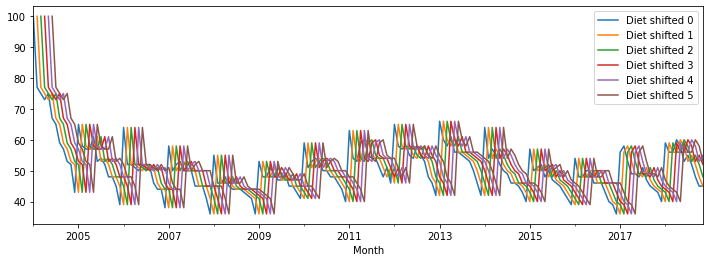

In [13]:
res.plot()

In [14]:
res.corr()['Diet shifted 0']

Diet shifted 0    1.000
Diet shifted 1    0.625
Diet shifted 2    0.538
Diet shifted 3    0.444
Diet shifted 4    0.313
Diet shifted 5    0.204
Name: Diet shifted 0, dtype: float64

In [15]:
total_shifts = 160
shifts = [ts.shift(x).rename(f"Diet shifted {x}") for x in range(total_shifts)]
res = pd.concat(shifts,axis=1)
res

,Diet shifted 0,Diet shifted 1,Diet shifted 2,Diet shifted 3,Diet shifted 4,Diet shifted 5,Diet shifted 6,Diet shifted 7,Diet shifted 8,Diet shifted 9,...,Diet shifted 150,Diet shifted 151,Diet shifted 152,Diet shifted 153,Diet shifted 154,Diet shifted 155,Diet shifted 156,Diet shifted 157,Diet shifted 158,Diet shifted 159
Month,,,,,,,,,,,,,,,,,,,,,
2004-01-01,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-02-01,77,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-03-01,75,77.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-04-01,73,75.0,77.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-05-01,75,73.0,75.0,77.0,100.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-01,55,53.0,58.0,60.0,56.0,56.0,59.0,40.0,43.0,44.0,...,64.0,39.0,45.0,48.0,48.0,52.0,54.0,53.0,61.0,57.0
2018-08-01,52,55.0,53.0,58.0,60.0,56.0,56.0,59.0,40.0,43.0,...,52.0,64.0,39.0,45.0,48.0,48.0,52.0,54.0,53.0,61.0
2018-09-01,48,52.0,55.0,53.0,58.0,60.0,56.0,56.0,59.0,40.0,...,52.0,52.0,64.0,39.0,45.0,48.0,48.0,52.0,54.0,53.0


<AxesSubplot:>

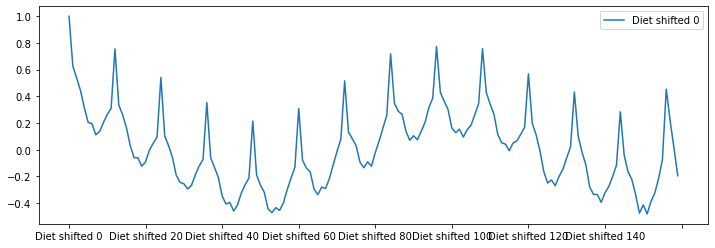

In [16]:
res.corr()[['Diet shifted 0']].plot()

## ACF & PACF  Plots

### Autocorrelation Function Plots

https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/

> - "The **autocorrelation function** is a function that represents autocorrelation of a time series as a function of the time lag."
- The autocorrelation function tells interesting stories about trends and seasonality. For example, if the original time series repeats itself every five days, you would expect to see a spike in the autocorrelation function at 5 days.



In [23]:
## Lab Function
from statsmodels.tsa.stattools import adfuller

def adfuller_test_df(ts,index=['AD Fuller Results']):
    """Returns the AD Fuller Test Results and p-values for the null hypothesis
    that there the data is non-stationary (that there is a unit root in the data)"""
    
    df_res = adfuller(ts)
    
    names = ['Test Statistic','p-value','#Lags Used','# of Observations Used']
    res  = dict(zip(names,df_res[:4]))
    
    res['p<.05'] = res['p-value']<.05
    res['Stationary?'] = res['p<.05']
    
    if isinstance(index,str):
        index = [index]
    res_df = pd.DataFrame(res,index=index)
    res_df = res_df[['Test Statistic','#Lags Used',
                     '# of Observations Used','p-value','p<.05',
                    'Stationary?']]
    return res_df
adfuller_test_df(ts)


def stationarity_check(TS,window=8,plot=True,index=['AD Fuller Results']):
    """Adapted from https://github.com/learn-co-curriculum/dsc-removing-trends-lab/tree/solution"""
    
    # Calculate rolling statistics
    roll_mean = TS.rolling(window=window, center=False).mean()
    roll_std = TS.rolling(window=window, center=False).std()
    
    # Perform the Dickey Fuller Test
    dftest = adfuller_test_df(TS,index=index)
#     display(dftest)
    if plot:
        # Plot rolling statistics:
        fig = plt.figure(figsize=(12,6))
        plt.plot(TS, color='blue',label=f'Original (freq={TS.index.freq})')
        plt.plot(roll_mean, color='red', label=f'Rolling Mean (window={window})')
        plt.plot(roll_std, color='black', label = f'Rolling Std (window={window})')
        plt.legend(loc='best')
        plt.title('Rolling Mean & Standard Deviation')
        display(dftest)
        plt.show(block=False)
        
    return dftest
    

In [24]:
file = '../topic_37_intro_to_time_series/baltimore_crime_counts_2021.csv'
df = pd.read_csv(file,parse_dates=True,index_col='CrimeDateTime')
df

,HOMICIDE,AGG. ASSAULT,COMMON ASSAULT,LARCENY,AUTO THEFT,ROBBERY - CARJACKING,BURGLARY,LARCENY FROM AUTO,ROBBERY - COMMERCIAL,SHOOTING,ROBBERY - RESIDENCE,ROBBERY - STREET,ARSON,RAPE
CrimeDateTime,,,,,,,,,,,,,,
2014-01-01 00:00:00+00:00,2,22,19,34,9,0.0,20,15,2,2,1.0,8.0,0.0,5.0
2014-01-02 00:00:00+00:00,3,6,23,26,7,1.0,28,10,1,0,1.0,4.0,0.0,0.0
2014-01-03 00:00:00+00:00,1,11,17,16,3,0.0,13,6,1,1,1.0,2.0,0.0,0.0
2014-01-04 00:00:00+00:00,0,14,23,23,14,0.0,20,15,1,0,1.0,7.0,0.0,0.0
2014-01-05 00:00:00+00:00,0,9,22,19,11,2.0,14,13,0,2,1.0,10.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-18 00:00:00+00:00,0,9,12,19,8,0.0,9,5,1,3,2.0,5.0,2.0,0.0
2021-05-19 00:00:00+00:00,1,7,24,12,10,1.0,6,5,0,0,2.0,6.0,0.0,0.0
2021-05-20 00:00:00+00:00,0,15,15,14,5,3.0,10,6,2,3,1.0,10.0,0.0,0.0


<AxesSubplot:xlabel='CrimeDateTime'>

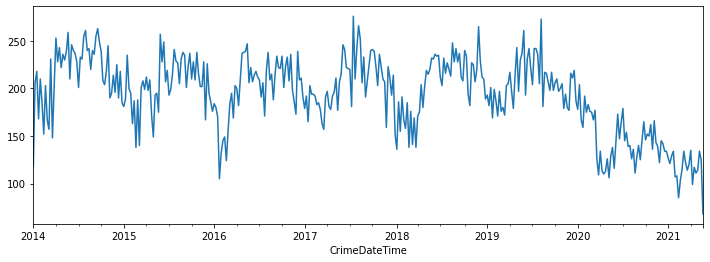

In [25]:
ts = df['LARCENY'].resample('W').sum()
ts.plot()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

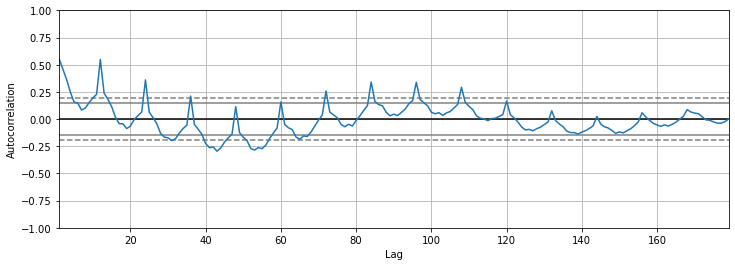

In [26]:
ts= trends['diet: (Worldwide)']
pd.plotting.autocorrelation_plot(ts)

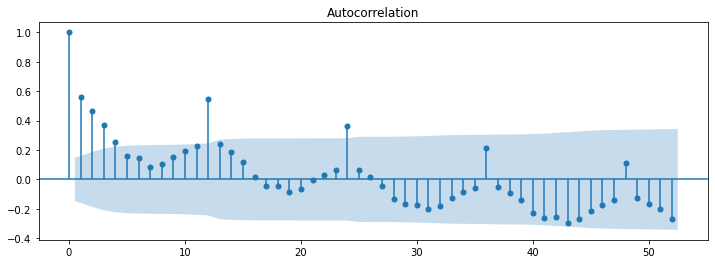

In [27]:
import statsmodels.graphics.tsaplots as tsa
tsa.plot_acf(ts,lags=52);

### Partial-Autocorrelation Function Plot


> "The **partial autocorrelation function** can be interpreted as a regression of the series against its past lags.
 
 > It helps you come up with a possible order for the auto regressive term. The terms can be interpreted the same way as a standard linear regression, that is the contribution of a change in that particular lag while holding others constant. "

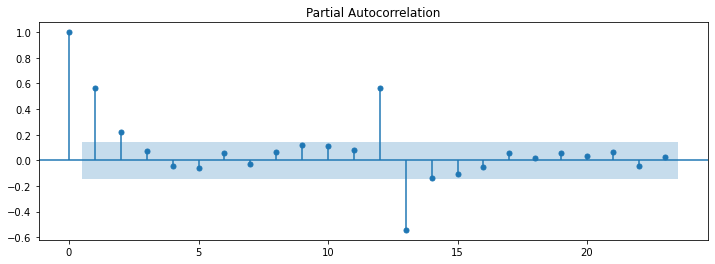

In [30]:
tsa.plot_pacf(ts);

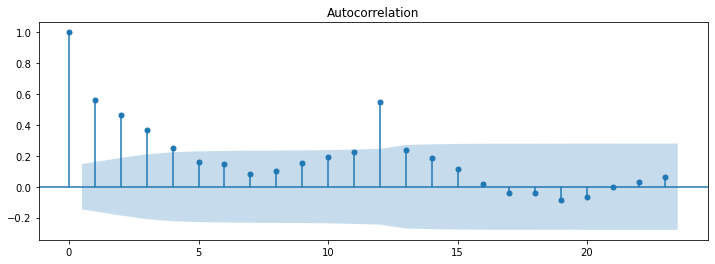

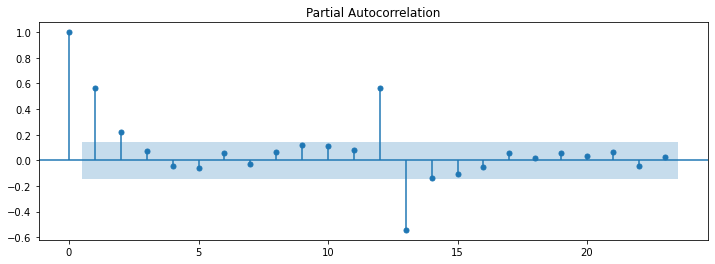

In [31]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
# mpl.rcParams['figure.figsize'] = (12,4)
plot_acf(ts);
plot_pacf(ts);

#  ARMA MODELS


## Autoregressive Model (AR)



An autoregressive (AR) model is when a value from a time series is regressed on previous values from the same time series.

In words, the mathematical idea is the following:

$$ \text{Today = constant + slope} \times \text{yesterday + noise} $$

Or, mathematically:
$$\large Y_t = \mu + \phi * Y_{t-1}+\epsilon_t$$

Some notes based on this formula:
- If the slope is 0, the time series is a white noise model with mean $\mu$
- If the slope is not 0, the time series is autocorrelated
- Bigger slope means bigger autocorrelation
- When there is a negative slope, the time series follows an oscillatory process

<!---

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-arma-models-online-ds-pt-100719/master/images/AR_model.png">

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-arma-models-online-ds-pt-100719/master/images/AR_PACF.png"> --->

## The  Moving Average Model




The Moving Average model can be described as the weighted sum of today's and yesterday's noise.

In words, the mathematical idea is the following:

$$ \text{Today = Mean + Noise + Slope} \times \text{yesterday's noise} $$

Or, mathematically:
$$\large Y_t = \mu +\epsilon_t + \theta * \epsilon_{t-1}$$

Some notes based on this formula:
- If the slope is 0, the time series is a white noise model with mean $\mu$
- If the slope is not 0, the time series is autocorrelated and depends on the previous white noise process
- Bigger slope means bigger autocorrelation
- When there is a negative slope, the time series follow an oscillatory process


## Higher-order AR and MA models




Let's look at the formulas of AR and MA again:

- AR: $Y_t = \mu + \phi * Y_{t-1}+\epsilon_t$
- MA: $Y_t = \mu +\epsilon_t + \theta * \epsilon_{t-1}$

Note that these models are constructed in a way that processes only depend directly on the previous observation in the process. These models are so-called "1st order models", and denoted by AR(1) and MA(1) processes respectively. Let's look at AR(2) and MA(2).

- AR(2): $$Y_t = \mu + \phi_1 * Y_{t-1}+\phi_2 * Y_{t-2}+\epsilon_t$$
- MA(2): $$Y_t = \mu +\epsilon_t + \theta_1 * \epsilon_{t-1}+ \theta_2 * \epsilon_{t-2}$$



___

# ARIMA MODELS:


## The ARIMA Time Series Model

One of the most common methods used in time series forecasting is known as the ARIMA model, which stands for **AutoregRessive Integrated Moving Average**. ARIMA is a model that can be fitted to time series data in order to better understand or predict future points in the series.

Let's have a quick introduction to ARIMA. The ARIMA forecasting for a stationary time series is nothing but a linear (like a linear regression) equation. The predictors depend on the parameters (p,d,q) of the ARIMA model:

### Number of AR (Auto-Regressive) terms (p): 

`p` is the auto-regressive part of the model. It allows us to incorporate the effect of past values into our model. Intuitively, this would be similar to stating that it is likely to rain tomorrow if it has been raining for past 3 days. AR terms are just lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).

### Number of Differences (d):

`d` is the **Integrated** component of an ARIMA model. This value is concerned with the amount of differencing as it identifies the number of lag values to subtract from the current observation. Intuitively, this would be similar to stating that it is likely to rain tomorrow if the difference in amount of rain in the last *n* days is small. 

### Number of MA (Moving Average) terms (q): 

`q` is the moving average part of the model which is used to set the error of the model as a linear combination of the error values observed at previous time points in the past. MA terms form lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where `e(i)` is the difference between the moving average at ith instant and actual value.

These three distinct integer values, (p, d, q), are used to parametrize ARIMA models. Because of that, ARIMA models are denoted with the notation `ARIMA(p, d, q)`. Together these three parameters account for seasonality, trend, and noise in datasets:

* `(p, d, q)` are the non-seasonal parameters described above.
* `(P, D, Q)` follow the same definition but are applied to the seasonal component of the time series. 
* The term `s` is the periodicity of the time series (4 for quarterly periods, 12 for yearly periods, etc.).

A detailed article on these parameters is available [HERE](https://www.quantstart.com/articles/Autoregressive-Integrated-Moving-Average-ARIMA-p-d-q-Models-for-Time-Series-Analysis).

The seasonal ARIMA method can appear daunting because of the multiple tuning parameters involved. In the next section, we will describe how to automate the process of identifying the optimal set of parameters for the seasonal ARIMA time series model.

## READING PACF/ACF FOR AR/MA MODEL ORDERS

INFO FROM UDEMY

- **USE ACF TO JUDGE IF MA OR AR COMPONENTS:**
    - If lag 1 is positive: AR
    - If lag 1 is negatige: MA
    
- **PACF is best for picking AR (p)**
- **ACF is best for picking MA(q)**
    - If sharp drop off at lag of k (k= point on x axis) means use an AR model of order k.
    - If slow gradual decline: use MA
    
    
___
INFO FROM LESSONS:

- AR(p):
    - ACF for AR(p) would be strong until lag of p, then stagnant, then trail off. 
    - PACF for AR(p): Generally no correlation for lag values beyond p.
- MA(q):
    - ACF for MA(q) would show strong correlation up to a lag of q, the immedately delcine to minimal/no correction.
    - PACF would show strong relationship to the lag and tailing off to no correlation afterwards.
   
- Notation is generally ARMA(p,q)
- Example: ARMA(2,1) model equation
     $$Y_t = \mu + \phi_1 Y_{t-1}+\phi_2 Y_{t-2}+ \theta \epsilon_{t-1}+\epsilon_t$$

| Param| AR(p)   |   MA(q)  | ARMA(p,q)|
|------|------|------|------|
|   ACF | Tails off   |  Cuts off after lag q |  Tails off   |
|   PACF | Cuts off after lag p  |   Tails off  |  Tails off  |
  
#### Note on modeling

Seeing the table above, you might get an idea of why ACF and PACF are so useful when modeling! What you generally will try to do for any time series analysis is:

- Detrend your time series using differencing. ARMA models represent stationary processes, so we have to make sure there are no trends in our time series
- Look at ACF and PACF of the time series
- Decide on the AR, MA, and order of these models
- Fit the model to get the correct parameters and use for prediction

In [ ]:
plot_acf(ts);
plot_pacf(ts);

# Activity: SARIMA Lab

- Repo folder > Phase_4 > topic_38... 

# Appendix

## `pmdarima.auto_arima`

In [32]:
# !pip install -U pmdarima
# import pmdarima
# pmdarima.auto_arima?
